In [44]:
import skfuzzy.cluster as fuzz
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.data"
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.test"

cols = ["CLASS", "REGION-CENTROID-COL", "REGION-CENTROID-ROW", "REGION-PIXEL-COUNT", "SHORT-LINE-DENSITY-5", "SHORT-LINE-DENSITY-2", "VEDGE-MEAN", "VEDGE-SD", "HEDGE-MEAN", "HEDGE-SD", "INTENSITY-MEAN","RAWRED-MEAN","RAWBLUE-MEAN","RAWGREEN-MEAN","EXRED-MEAN","EXBLUE-MEAN","EXGREEN-MEAN","VALUE-MEAN","SATURATION-MEAN","HUE-MEAN"]

df1 = pd.read_csv(url1, header=2, names=cols)
df2 = pd.read_csv(url2, header=2, names=cols)
df3 = pd.concat([df1, df2]).drop(["REGION-CENTROID-COL", "REGION-CENTROID-ROW", "REGION-PIXEL-COUNT"], axis=1)
best_Us = []

In [45]:
df1 = df3.iloc[:,4:9] 
df2 = df3.iloc[:,10:19]
df3 = df3.iloc[:,4:19]

In [46]:
X = df3.iloc[:, :-1].to_numpy(dtype=np.float32) 
y = df3.iloc[:, -1].to_numpy()
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [30]:
#Para m=2
n_clusters = 7

for df3 in range(3): 
    best_obj_func = np.inf 
    best_U = None 
    for i in range(50):
        cntr, u, u0, d, jm, p, fpc = fuzz.cmeans(data=X.T, c=n_clusters, m=2, error=1e-3, maxiter=100, metric='cityblock')
        if jm.mean() < best_obj_func:
            best_obj_func = jm.mean()
            best_U = u
    best_Us.append(best_U) 

best_jm = np.inf

cntr, u, _, _, jm, _, _ = fuzz.cmeans(data=X.T, c=n_clusters, m=2, error=1e-3, maxiter=1000, metric='cityblock')
if jm.mean() < best_jm:
    best_jm = jm.mean()
    best_U = u
print("Melhor resultado de acordo com a Função objetivo:", best_jm)

Melhor resultado de acordo com a Função objetivo: 13256.059938124714


In [31]:
#PROTÓTIPOS m=2
for i, proto in enumerate(cntr):
    print("Prototype {}: {}".format(i+1, proto))

Prototype 1: [-0.10651887 -0.33299134 -0.11702173  2.16978788  2.16925001  2.11364037
  2.21365936 -1.76919352  1.4050837  -0.60653643  2.12134597 -0.97841564]
Prototype 2: [-0.05438969  0.11745102 -0.07562731  0.57685894  0.55460301  0.66921591
  0.48141227 -0.67101216  1.08935101 -1.17281056  0.65661223 -0.54744725]
Prototype 3: [-0.08753671 -0.39905617 -0.10204773 -0.80620583 -0.74944098 -0.83236194
 -0.82072636  1.17063625 -0.83577728  0.24217743 -0.85335061  0.40600893]
Prototype 4: [-0.04591247 -0.01256815 -0.04876719 -0.36785526 -0.34544152 -0.32626968
 -0.43518282  0.50249667 -0.02426467 -0.46277447 -0.35119718 -0.05941045]
Prototype 5: [-0.07597091 -0.36550827 -0.09859286 -0.88847908 -0.89717152 -0.87653078
 -0.88463804  0.64356937 -0.64902814  0.45429397 -0.9096384   1.93122111]
Prototype 6: [-0.00806114  0.52226036  0.05274107  0.20591859  0.20955251  0.25079028
  0.14644387 -0.13446398  0.46827947 -0.65856607  0.23264039 -0.58049795]
Prototype 7: [-0.07669038 -0.08182623 -0

In [32]:
#Para m = 1.6
best_jm = np.inf
cntr1, u, _, _, jm, _, _ = fuzz.cmeans(data=X.T, c=n_clusters, m=1.6, error=1e-3, maxiter=100, metric='cityblock')
if jm.mean() < best_jm:
    best_jm = jm.mean()
    best_U = u
print("Melhor resultado de acordo com a Função objetivo:", best_jm)

Melhor resultado de acordo com a Função objetivo: 22972.54762674916


In [33]:
#PROTÓTIPOS m=1.6
for i, proto in enumerate(cntr1):
    print("Prototype {}: {}".format(i+1, proto))

Prototype 1: [-0.09253064 -0.34426159 -0.10098996  1.78589107  1.6859616   1.86699084
  1.76546429 -2.35892539  2.00591303 -1.033154    1.87121087 -0.68953238]
Prototype 2: [-0.09915471 -0.31418192 -0.10756322  2.3713938   2.43247724  2.2399832
  2.44376547 -1.37396743  1.06829224 -0.43223234  2.24946592 -1.13321542]
Prototype 3: [-0.07352944 -0.08513276 -0.08813675 -0.5638463  -0.58086196 -0.68940371
 -0.39096497  0.30407616 -1.30019104  1.89798515 -0.57993681 -0.09318532]
Prototype 4: [-0.04532225  0.14730917 -0.08034874  0.44918647  0.43876502  0.52584084
  0.36253661 -0.45981122  0.87986471 -1.02966459  0.511155   -0.56297195]
Prototype 5: [-0.04701618 -0.03549724 -0.05942906 -0.34955189 -0.33489722 -0.30623861
 -0.41167295  0.41720712  0.00227524 -0.42221547 -0.33168427 -0.09184502]
Prototype 6: [ 0.6376114   3.0309199   1.38488999  0.03735191  0.0152639   0.07154218
  0.01729827 -0.23080128  0.25875213 -0.20696217  0.05223237 -0.49027712]
Prototype 7: [-0.08341829 -0.39082369 -0.

In [34]:
#Para m = 1.1
best_jm = np.inf
cntr3, u, _, _, jm, _, _ = fuzz.cmeans(data=X.T, c=n_clusters, m=1.1, error=1e-3, maxiter=100, metric='cityblock')
if jm.mean() < best_jm:
    best_jm = jm.mean()
    best_U = u
print("Melhor resultado de acordo com a Função objetivo:", best_jm)

Melhor resultado de acordo com a Função objetivo: 36956.62344599413


In [35]:
#PROTÓTIPOS m=1.1
for i, proto in enumerate(cntr3):
    print("Prototype {}: {}".format(i+1, proto))

Prototype 1: [10.5669311   8.45142326 12.68127845  0.40077017  0.34789901  0.41078763
  0.43531435 -0.8056354   0.39555403  0.13767882  0.39445582 -0.30562708]
Prototype 2: [ 0.13517305  1.05405106  0.28647443 -0.02571845 -0.02924955  0.00922644
 -0.06386123 -0.0111299   0.21205554 -0.34812319 -0.01228248 -0.5132701 ]
Prototype 3: [-0.11569066 -0.36953456 -0.1278512   1.80418859  1.70634789  1.88235872
  1.78505487 -2.35484994  2.0013745  -1.02955113  1.8867932  -0.69905407]
Prototype 4: [-0.05419179 -0.05696924 -0.08330753 -0.48781237 -0.48927451 -0.52381655
 -0.43794478  0.38338502 -0.64033123  0.70046249 -0.48457775 -0.01786769]
Prototype 5: [-0.11486188 -0.31969734 -0.12524014  2.38157492  2.44566605  2.24734222
  2.45431475 -1.35495384  1.05781406 -0.43354541  2.25692725 -1.14068506]
Prototype 6: [-0.08121262 -0.38149864 -0.09984138 -0.86381235 -0.84895815 -0.87157754
 -0.85933282  0.83717658 -0.76032363  0.4487185  -0.89537033  1.01706498]
Prototype 7: [-0.038888    0.14076904 -0

In [36]:
#MODIFIED PARTITION COEFFICIENT 

#Para df1
cntr, u, u0, d, jm, p, fpc = fuzz.cmeans(data=X.T, c=n_clusters, m=2, error=1e-3, maxiter=100, metric='cityblock')
FE = -np.sum(u*np.log(u))
PE = -np.sum(u.mean(axis=1)*np.log(u.mean(axis=1)))
PC = np.sum(np.max(u, axis=0)) / X.shape[0]
print(f"Modified Partition Coefficient (df1): {PC} Partition entropy (df1): {PE}")

#Para df2
cntr, u, u0, d, jm, p, fpc = fuzz.cmeans(data=X.T, c=n_clusters, m=2, error=1e-3, maxiter=100, metric='cityblock')
FE = -np.sum(u*np.log(u))
PE = -np.sum(u.mean(axis=1)*np.log(u.mean(axis=1)))
PC = np.sum(np.max(u0, axis=0)) / X.shape[0]
print(f"Modified Partition Coefficient (df2): {PC} Partition entropy (df2): {PE}")

#Para df3
cntr, u, u0, d, jm, p, fpc = fuzz.cmeans(data=X.T, c=n_clusters, m=2, error=1e-3, maxiter=100, metric='cityblock')
FE = -np.sum(u*np.log(u))
PE = -np.sum(u.mean(axis=1)*np.log(u.mean(axis=1)))
PC = np.sum(np.max(best_U, axis=0)) / X.shape[0]
print(f"Modified Partition Coefficient (df3): {PC} Partition entropy (df3): {PE} ")


Modified Partition Coefficient (df1): 0.6989202045896977 Partition entropy (df1): 1.8946365173696853
Modified Partition Coefficient (df2): 0.25718111384765524 Partition entropy (df2): 1.8724478571921397
Modified Partition Coefficient (df3): 0.982283422113123 Partition entropy (df3): 1.8724482431549916 


In [37]:
n_clusters = 7

cntr1, u1, _, _, _, _, _ = fuzz.cmeans(data=df1.T, c=n_clusters, m=2, error=1e-3, maxiter=100, metric='cityblock')
cntr2, u2, _, _, _, _, _ = fuzz.cmeans(data=df2.T, c=n_clusters, m=2, error=1e-3, maxiter=100, metric='cityblock')
cntr3, u3, _, _, _, _, _ = fuzz.cmeans(data=X.T, c=n_clusters, m=2, error=1e-3, maxiter=100, metric='cityblock')

u1_crisp = np.argmax(u1, axis=0)
u2_crisp = np.argmax(u2, axis=0)
u3_crisp = np.argmax(u3, axis=0)

print("Partição nítida do conjunto de dados 1:")
print(u1_crisp)
print("Partição nítida do conjunto de dados 2:")
print(u2_crisp)
print("Partição nítida do conjunto de dados 3:")
print(u3_crisp)

Partição nítida do conjunto de dados 1:
[2 2 2 ... 2 2 2]
Partição nítida do conjunto de dados 2:
[0 0 0 ... 0 0 0]
Partição nítida do conjunto de dados 3:
[4 4 4 ... 4 4 3]


In [47]:
# ÍNDICE DE RAND AJUSTADO

from sklearn.metrics import adjusted_rand_score

labels1 = np.argmax(u1, axis=0)
labels2 = np.argmax(u2, axis=0)
labels3 = np.argmax(u3, axis=0)

y1 = df1.iloc[:, -1].to_numpy()
y2 = df2.iloc[:, -1].to_numpy()
y3 = df3.iloc[:, -1].to_numpy()


ari1 = adjusted_rand_score(y1, labels1)
ari2 = adjusted_rand_score(y2, labels2)
ari3 = adjusted_rand_score(y3, labels3)

# Print results
print("Adjusted Rand Index for dataset 1:", ari1)
print("Adjusted Rand Index for dataset 2:", ari2)
print("Adjusted Rand Index for dataset 3:", ari3)

Adjusted Rand Index for dataset 1: 0.030921785423623033
Adjusted Rand Index for dataset 2: 0.01437980247916568
Adjusted Rand Index for dataset 3: 0.014155398710015086


In [43]:
labels = np.argmax(u, axis=0)
true_labels = np.array([int(i)-1 for i in y]) # Convert y to 0-based labels

cm = confusion_matrix(true_labels, labels)
print(cm)

[[  0   0   0   0   0   0   1   1   0   0   0]
 [  0   0   0   0 322 204   0 380 142 188 147]
 [  0   0   0   0  85 200   0 108   0   0  67]
 [  0   0   0   0   0   1   0 137   0   0   0]
 [  0   0   0   0   0   0  52   0   0   0   0]
 [  0   0   0   0   0   0 275   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]]


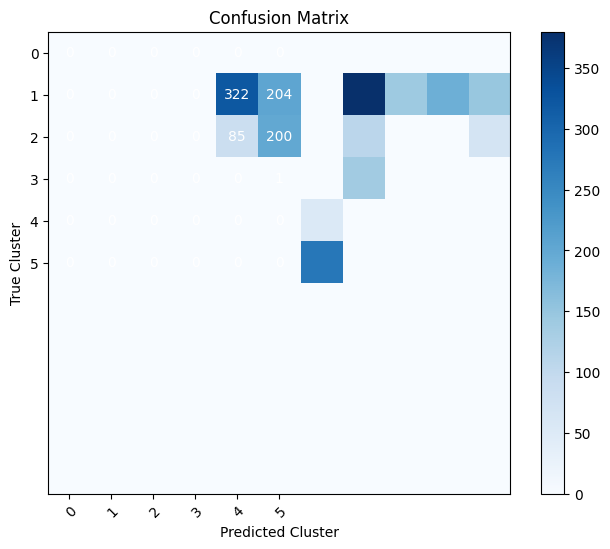

In [44]:
import matplotlib.pyplot as plt
import numpy as np

num_classes = len(np.unique(true_labels))
fig, ax = plt.subplots(figsize=(8, 6))

im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
cbar = ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(num_classes),
       yticks=np.arange(num_classes),
       xticklabels=np.arange(num_classes),
       yticklabels=np.arange(num_classes),
       xlabel='Predicted Cluster',
       ylabel='True Cluster')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(num_classes):
    for j in range(num_classes):
        text = ax.text(j, i, cm[i, j], ha="center", va="center", color="white")


ax.set_title("Confusion Matrix")
plt.show()


In [45]:
def fmeasure(cm):
    l = len(cm)
    s = cm.sum()
    s_true = cm.sum(axis = 1)
    s_predict = cm.sum(axis = 0)
    f_score = np.zeros((l, l))
    for i in range(dfs):
        for j in range(7):
            f_score[i, j] = (2*cm[i, j])/(s_true[i]+s_predict[j])

    return ((f_score.max(axis =1)*s_true).sum())/s

fmeasure(cm)

0.21540392681073228

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import f1_score

n_clusters = 7
partitions = []
for i in range(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=i)
    labels = kmeans.fit_predict(X)
    partitions.append(labels)

for i in range(n_clusters):
    for j in range(i+1, n_clusters):
        ari = adjusted_rand_score(partitions[i], partitions[j])
        fmeasure = f1_score(partitions[i], partitions[j], average='weighted')
        print(f"Índice de Rand entre partições {i+1} e {j+1}: {ari:.3f}")
        print(f"F-measure entre partições {i+1} e {j+1}: {fmeasure:.3f}")


Índice de Rand entre partições 1 e 2: 0.995
F-measure entre partições 1 e 2: 0.233
Índice de Rand entre partições 1 e 3: 1.000
F-measure entre partições 1 e 3: 0.000
Índice de Rand entre partições 1 e 4: 1.000
F-measure entre partições 1 e 4: 0.000
Índice de Rand entre partições 1 e 5: 0.925
F-measure entre partições 1 e 5: 0.244
Índice de Rand entre partições 1 e 6: 0.995
F-measure entre partições 1 e 6: 0.002
Índice de Rand entre partições 1 e 7: 1.000
F-measure entre partições 1 e 7: 0.185
Índice de Rand entre partições 2 e 3: 0.995
F-measure entre partições 2 e 3: 0.322
Índice de Rand entre partições 2 e 4: 0.995
F-measure entre partições 2 e 4: 0.144
Índice de Rand entre partições 2 e 5: 0.929
F-measure entre partições 2 e 5: 0.438
Índice de Rand entre partições 2 e 6: 1.000
F-measure entre partições 2 e 6: 0.000
Índice de Rand entre partições 2 e 7: 0.995
F-measure entre partições 2 e 7: 0.000
Índice de Rand entre partições 3 e 4: 1.000
F-measure entre partições 3 e 4: 0.332
Índi

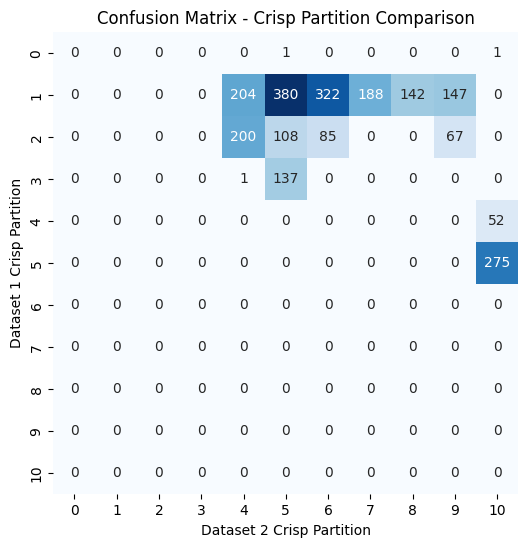

In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel("Dataset 2 Crisp Partition")
plt.ylabel("Dataset 1 Crisp Partition")
plt.title("Confusion Matrix - Crisp Partition Comparison")
plt.show()
